In [1]:
from google.colab import drive
drive.mount('/content/drive')
#

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/Amoako419/Brain_tumor.git


fatal: destination path 'Brain_tumor' already exists and is not an empty directory.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [4]:
train_dir = '/content/Brain_tumor/data/Training'
validation_dir = '/content/Brain_tumor/data/Validation'
test_dir = '/content/Brain_tumor/data/Testing'


In [5]:
import tensorflow as tf

# Load training data
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(64,64),
    batch_size=32,
    label_mode='int'
)

# Load validation data
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(64,64),
    batch_size=32,
    label_mode='int'
)

# Load testing data
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(64,64),
    batch_size=32,
    label_mode='int'
)

batch_size = 64
class_names = train_dataset.class_names # Get the class names from the training dataset
print(class_names)

# import tensorflow as tf

# # Apply batching to the datasets
# batch_size = 32  # Adjust as needed
# train_dataset = train_dataset.batch(batch_size, drop_remainder=True)
# validation_dataset = validation_dataset.batch(batch_size, drop_remainder=True)
# test_dataset = test_dataset.batch(batch_size, drop_remainder=True)

# # Prefetch to improve performance
# train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
# validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Verify the dataset shapes
for images, labels in train_dataset.take(1):
    print(images.shape, labels.shape)

Found 5712 files belonging to 4 classes.
Found 426 files belonging to 4 classes.
Found 885 files belonging to 4 classes.
['glioma', 'meningioma', 'notumor', 'pituitary']
(32, 64, 64, 3) (32,)


In [22]:
import tensorflow as tf

def create_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    base_model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet', input_tensor=inputs)

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model(inputs)
    x=tf.keras.layers.Conv2D(32, (1,1), activation='relu')(x)
    x=tf.keras.layers.AveragePooling2D((2, 2))(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(64, (1, 1), activation='relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Conv2D(128, (1, 1), activation='relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(256, activation='relu')(x)
    x=tf.keras.layers.Dropout(0.5)(x)
    x=tf.keras.layers.Dense(128, activation='relu')(x)
    x=tf.keras.layers.Dropout(0.5)(x)
    x=tf.keras.layers.Dense(64, activation='relu')(x)
    x=tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (64, 64, 3)  # Adjusted to 3 channels
num_classes = 4

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model



In [23]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 2, 2, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 2, 2, 32)            │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 1, 1, 32)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 1, 1, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 1, 1, 64)            │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 1, 1, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 1, 1, 128)           │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 1, 1, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,156,068 (27.30 MB)

 Trainable params: 118,116 (461.39 KB)

 Non-trainable params: 7,037,952 (26.85 MB)

In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


In [25]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
hist=model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


179/179 ━━━━━━━━━━━━━━━━━━━━ 108s 492ms/step - accuracy: 0.4301 - loss: 1.3476 - val_accuracy: 0.6338 - val_loss: 0.9860
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 89s 495ms/step - accuracy: 0.7349 - loss: 0.7054 - val_accuracy: 0.7958 - val_loss: 0.6272
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 139s 476ms/step - accuracy: 0.7808 - loss: 0.5916 - val_accuracy: 0.8239 - val_loss: 0.4952
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 499ms/step - accuracy: 0.8047 - loss: 0.5310 - val_accuracy: 0.8263 - val_loss: 0.4983
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 470ms/step - accuracy: 0.8213 - loss: 0.4926 - val_accuracy: 0.8357 - val_loss: 0.4017
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 505ms/step - accuracy: 0.8528 - loss: 0.4363 - val_accuracy: 0.8192 - val_loss: 0.4297
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 136s 468ms/step - accuracy: 0.8525 - loss: 0.4165 - val_accuracy: 0.8427 - val_loss: 0.3532
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 481ms/step - accuracy: 0.8680 - loss: 0.3850

In [27]:
model.evaluate(test_dataset)

28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 561ms/step - accuracy: 0.8310 - loss: 0.4106


[0.3773794174194336, 0.8384180665016174]

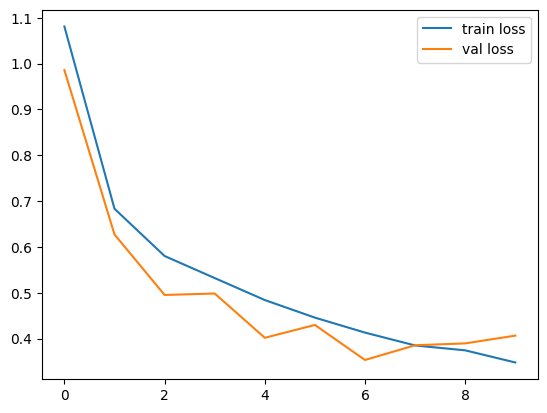

In [28]:

#plotting the learning curve
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()